### Which ML-algorithms are used?
### Regression Problem
Lineare Regression  <br>
DecisionTreeRegressor <br>
Support Vector Regression (SVR)<br>
Random Forest (RandomForestRegressor)<br>
KNeighborsClassifier (Knn)<br>
GradientBoostingRegressor

In [1]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd

### Dataset
Diabetes from sklearn <br>
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [3]:
k=10 #Number of Folds
kf = KFold(n_splits=k, shuffle=True, random_state=42) 
#kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

### Show fold distribution

In [4]:
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1}")
    print("Train Index:", train_index)
    print("Test Index:", test_index)
    print()

Fold 1
Train Index: [  0   1   2   3   4   5   6   7   8  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  31  32  33  34  35  36  37
  38  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  71  74  77  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 114 115 117 118 119 120
 121 122 123 124 125 127 128 129 130 131 133 134 135 136 137 138 139 141
 142 143 144 145 146 147 149 150 151 152 153 154 155 156 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 173 174 175 176 177 178 179 180
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 200
 201 202 203 204 205 206 207 208 210 212 213 214 215 216 217 218 219 220
 221 222 223 224 225 226 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 26

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [6]:
linreg = LinearRegression()
tree_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
svr = SVR(kernel='rbf', C=1.0, gamma='scale')
gb_reg = GradientBoostingRegressor()


In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [8]:
# ## Code for F1-Score
linreg_cross_val_scores = cross_val_score(linreg, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()
tree_reg_cross_val_scores = cross_val_score(tree_reg, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()
rf_reg_cross_val_scores = cross_val_score(rf_reg, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()
svr_cross_val_scores = cross_val_score(svr, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()
gb_reg_cross_val_scores = cross_val_score(gb_reg, X, y, cv=kf, scoring="neg_mean_absolute_error").mean()

In [9]:
cross_val_scores = {
    'Linear Regression': linreg_cross_val_scores,
    'Decision Tree': tree_reg_cross_val_scores,
    'Random Forest': rf_reg_cross_val_scores,
    'Support Vector Regression': svr_cross_val_scores,
    'Gradient Boosting Regression': gb_reg_cross_val_scores
}

sorted_cross_val_scores = sorted(cross_val_scores.items(), key=lambda x: x[1], reverse=True)

for i, (model, score) in enumerate(sorted_cross_val_scores, start=1):
    rounded_score = round(score, 3)
    print(f"{i}. {model}: {rounded_score}")

1. Linear Regression: -44.481
2. Random Forest: -47.254
3. Gradient Boosting Regression: -48.533
4. Support Vector Regression: -58.396
5. Decision Tree: -66.295


In [10]:
import matplotlib.pyplot as plt

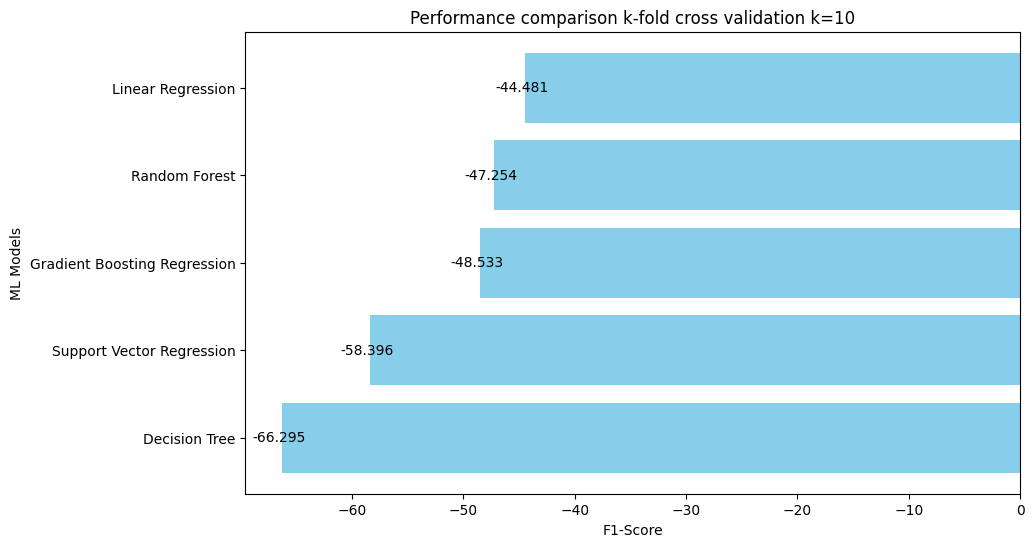

In [11]:
models = [model for model, _ in sorted_cross_val_scores]
scores = [score for _, score in sorted_cross_val_scores]

# Erstellt das Balkendiagramm
plt.figure(figsize=(10, 6))
bars = plt.barh(models, scores, color='skyblue')
plt.xlabel('F1-Score')
plt.ylabel('ML Models')
plt.title('Performance comparison k-fold cross validation k=10')
for bar, score in zip(bars, scores):
    plt.text(bar.get_width() - 0.3, bar.get_y() + bar.get_height()/2, f'{score:.3f}', 
             va='center', ha='center', color='black')

plt.gca().invert_yaxis()  
plt.show()

In [12]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

The following variant does exactly the same thing, except that we now have the option of executing individual actions after each iteration.

In [13]:
all_fold_scores = {model: [] for model in ['Linear Regression', 'Decision Trees', 'Random Forest', 'Support Vector Regression', 'Gradient Boosting Regression']}
placement_history = {model: [] for model in all_fold_scores.keys()}
mean_scores_history = {model: [] for model in all_fold_scores.keys()}  


#for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X,y), start=1): #for skf
for fold_idx, (train_idx, test_idx) in enumerate(kf.split(X), start=1): #for kf
    print(f"Fold {fold_idx}:")
    
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    linreg.fit(X_train, y_train)
    tree_reg.fit(X_train, y_train)
    rf_reg.fit(X_train, y_train)
    svr.fit(X_train, y_train)
    gb_reg.fit(X_train, y_train)
    
    linreg_predictions = linreg.predict(X_test)
    tree_reg_predictions = tree_reg.predict(X_test)
    rf_reg_predictions = rf_reg.predict(X_test)
    svr_predictions = svr.predict(X_test)
    gb_reg_predictions = gb_reg.predict(X_test)

    linreg_mae = mean_absolute_error(y_test, linreg_predictions)
    tree_reg_mae = mean_absolute_error(y_test, tree_reg_predictions)
    rf_reg_mae = mean_absolute_error(y_test, rf_reg_predictions)
    svr_mae = mean_absolute_error(y_test, svr_predictions)
    gb_reg_mae = mean_absolute_error(y_test, gb_reg_predictions)
    
    all_fold_scores['Linear Regression'].append(linreg_mae)
    all_fold_scores['Decision Trees'].append(tree_reg_mae)
    all_fold_scores['Random Forest'].append(rf_reg_mae)
    all_fold_scores['Support Vector Regression'].append(svr_mae)
    all_fold_scores['Gradient Boosting Regression'].append(gb_reg_mae)

    cross_val_scores_actual_fold = {
        'Linear Regression': linreg_mae,
        'Decision Trees': tree_reg_mae,
        'Random Forest': rf_reg_mae,
        'Support Vector Regression': svr_mae,
        'Gradient Boosting Regression': gb_reg_mae
    }
    
    sorted_cross_val_scores_actual_fold = sorted(cross_val_scores_actual_fold.items(), key=lambda x: x[1], reverse=False)

    for i, (model, score) in enumerate(sorted_cross_val_scores_actual_fold, start=1):
        rounded_score = round(score, 3)
        print(f"{i}. {model}: {rounded_score}")

    mean_scores = {model: np.mean(scores) for model, scores in all_fold_scores.items()}
    sorted_mean_scores = sorted(mean_scores.items(), key=lambda x: x[1], reverse=False)

    print()  
   
    for i, (model, mean_score) in enumerate(sorted_mean_scores, start=1):
        print(f"{i}. Average for {model} after {fold_idx} Folds: {round(mean_score, 3)}")
        placement_history[model].append(i)
        mean_scores_history[model].append(round(mean_score, 3))          
    print()



Fold 1:
1. Gradient Boosting Regression: 40.545
2. Linear Regression: 41.579
3. Random Forest: 42.312
4. Decision Trees: 55.089
5. Support Vector Regression: 57.895

1. Average for Gradient Boosting Regression after 1 Folds: 40.545
2. Average for Linear Regression after 1 Folds: 41.579
3. Average for Random Forest after 1 Folds: 42.312
4. Average for Decision Trees after 1 Folds: 55.089
5. Average for Support Vector Regression after 1 Folds: 57.895

Fold 2:
1. Linear Regression: 43.766
2. Random Forest: 46.213
3. Gradient Boosting Regression: 50.05
4. Support Vector Regression: 52.12
5. Decision Trees: 72.111

1. Average for Linear Regression after 2 Folds: 42.672
2. Average for Random Forest after 2 Folds: 44.263
3. Average for Gradient Boosting Regression after 2 Folds: 45.298
4. Average for Support Vector Regression after 2 Folds: 55.007
5. Average for Decision Trees after 2 Folds: 63.6

Fold 3:
1. Linear Regression: 38.354
2. Random Forest: 38.449
3. Gradient Boosting Regression: 4

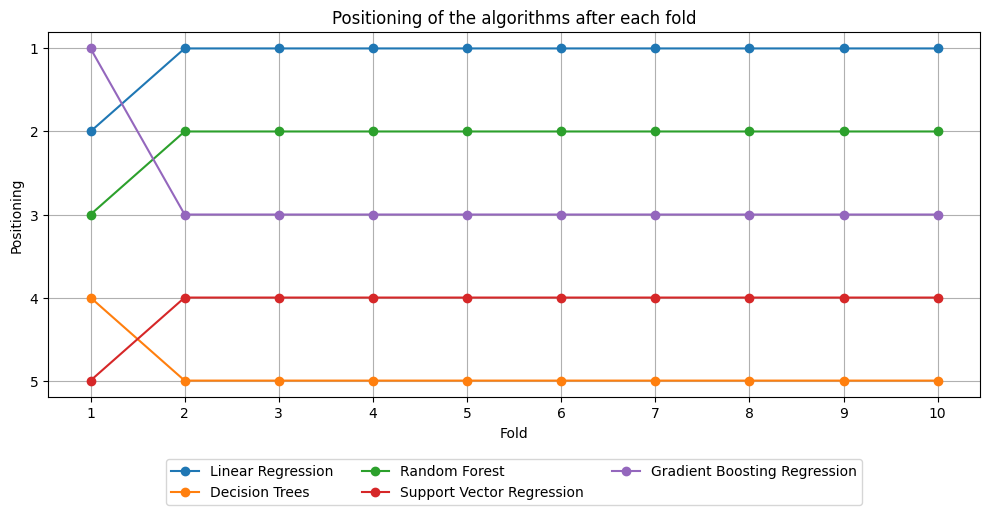

In [14]:
plt.figure(figsize=(10, 6))
for model, placements in placement_history.items():
    plt.plot(range(1, len(placements) + 1), placements, marker='o', label=model)

plt.gca().invert_yaxis()  
plt.xticks(range(1, kf.get_n_splits() + 1))
plt.yticks(range(1, max(max(placements) for placements in placement_history.values()) + 1))  

plt.xlabel('Fold')
plt.ylabel('Positioning')
plt.title('Positioning of the algorithms after each fold')


plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

plt.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.9])  
plt.show()


In [15]:
import scipy.stats as stats
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

In [17]:
mae_rf = mean_scores_history['Random Forest']
mae_lr = mean_scores_history['Linear Regression']
mae_tree = mean_scores_history['Decision Trees']
mae_svr = mean_scores_history['Support Vector Regression']
mae_boost = mean_scores_history['Gradient Boosting Regression']

best_model_name = sorted_cross_val_scores[0][0]

if best_model_name == 'Random Forest':
    mae_best = mae_rf
elif best_model_name == 'Linear Regression':
    mae_best = mae_lr
elif best_model_name == 'Decision Trees':
    mae_best = mae_tree
elif best_model_name == 'Support Vector Regression':
    mae_best = mae_svr
elif best_model_name == 'Gradient Boosting Regression':
    mae_best = mae_boost


def find_earliest_significant_fold_ttest(mae_best, mae):
    for i in range(len(mae_best)):
        t_stat, p_value = ttest_ind(mae_best[:i+1], mae[:i+1],alternative='less')                                                                     
        if p_value < 0.05: 
            return i+1, p_value
    return None, None

def find_earliest_significant_fold_manwhitneyu(mae_best, mae):
    for i in range(len(mae_best)):
        t_stat, p_value = mannwhitneyu(mae_best[:i+1], mae[:i+1],alternative='less')  
                                                                                
        if p_value < 0.05: 
            return i+1, p_value
    return None, None


algorithms = {
            'Linear Regression': mae_lr,
            'Decision Trees': mae_tree,
            'Random Forest': mae_rf,
            'Support Vector Regression': mae_svr,
            'Gradient Boosting Regression': mae_boost
    }

print("T-Test:")
for algo_name, mae in algorithms.items():
    if mae_best != mae:
        fold, p_value = find_earliest_significant_fold_ttest(mae_best, mae)
        if fold:
            print(f"{best_model_name} is significantly better than {algo_name} from Fold {fold} (p-Wert: {p_value:.4f})")
        else:
            print(f"{best_model_name} is not significantly better than {algo_name} within 10 folds.")

print("Mann-Whitney-U-Test:")
for algo_name, mae in algorithms.items():
    if mae_best != mae:
        fold, p_value = find_earliest_significant_fold_manwhitneyu(mae_best, mae)
        if fold:
            print(f"{best_model_name}  is significantly better than {algo_name} from Fold {fold} (p-Wert: {p_value:.4f})")
        else:
            print(f"{best_model_name} is not significantly better than {algo_name} within 10 folds.")


T-Test:
Linear Regression is significantly better than Decision Trees from Fold 2 (p-Wert: 0.0284)
Linear Regression is significantly better than Random Forest from Fold 4 (p-Wert: 0.0390)
Linear Regression is significantly better than Support Vector Regression from Fold 2 (p-Wert: 0.0057)
Linear Regression is significantly better than Gradient Boosting Regression from Fold 6 (p-Wert: 0.0265)
Mann-Whitney-U-Test:
Linear Regression  is significantly better than Decision Trees from Fold 4 (p-Wert: 0.0143)
Linear Regression  is significantly better than Random Forest from Fold 5 (p-Wert: 0.0476)
Linear Regression  is significantly better than Support Vector Regression from Fold 4 (p-Wert: 0.0143)
Linear Regression  is significantly better than Gradient Boosting Regression from Fold 7 (p-Wert: 0.0265)


### **Evaluation**

The results can be evaluated in three ways:<br>
1.interpretation of the diagram<br>
2.Statistical significance using t-tests<br>
3. statistical significance using the Mann-Whitney U-test<br>
<br>
1st In this data set, we can say with certainty in the **diagram** from the **2 fold** that linear regression is the best algorithm.<br>
2-3 However, using the **T-test** and the **Mann-Whitney-U-test**, we can only show that linear regression is the best algorithm from the **6 or 7 fold** in the worst case.